# Seleccion de base de datos en Kaggle #
- Datos de salud del reloj inteligente

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammedarfathr/smartwatch-health-data-uncleaned")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alejo\.cache\kagglehub\datasets\mohammedarfathr\smartwatch-health-data-uncleaned\versions\1


In [19]:
# Se busca donde está especificada la base de datos
import os

# Ruta donde se descargó el dataset
path = r"C:\Users\Alejo\.cache\kagglehub\datasets\mohammedarfathr\smartwatch-health-data-uncleaned\versions\1"
print("Archivos en el directorio:\n", os.listdir(path))

Archivos en el directorio:
 ['unclean_smartwatch_health_data.csv']


## Mini EDA ##

In [20]:
import pandas as pd
file_name = "unclean_smartwatch_health_data.csv" 
file_path = os.path.join(path, file_name)

# Se observan las primeras filas de la columna 
df = pd.read_csv(file_path)
print(df.head())

   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  


In [21]:
# Mostrar los tipos de datos de cada columna
print("\nTipos de datos en cada columna:\n", df.dtypes)


Tipos de datos en cada columna:
 User ID                   float64
Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)     object
Activity Level             object
Stress Level               object
dtype: object


In [22]:
# Contar valores faltantes en cada columna
print("\nValores faltantes en cada columna:\n", df.isnull().sum())


Valores faltantes en cada columna:
 User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


In [23]:
print(df.describe())

           User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count
count  9799.000000       9600.000000             9700.000000   9900.000000
mean   3007.480253         76.035462               97.841581   6985.685885
std    1150.581542         19.412483                1.732863   6885.809680
min    1001.000000         40.000000               90.791208      0.910138
25%    1997.500000         64.890152               96.662683   2021.039657
50%    2998.000000         75.220601               98.010642   4962.534599
75%    4004.000000         85.198249               99.376179   9724.902880
max    4999.000000        296.593970              100.000000  62486.690753


In [24]:
df['User ID'] = pd.to_numeric(df['User ID'], errors='coerce').astype('Int64')  
df['Heart Rate (BPM)'] = pd.to_numeric(df['Heart Rate (BPM)'], errors='coerce').astype('float64')
df['Blood Oxygen Level (%)'] = pd.to_numeric(df['Blood Oxygen Level (%)'], errors='coerce').astype('float64')
df['Step Count'] = pd.to_numeric(df['Step Count'], errors='coerce').astype('float64')
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce').astype('float64')
df['Stress Level'] = pd.to_numeric(df['Stress Level'], errors='coerce').astype('Int64')  

# Arreglar valores en 'Activity Level'
df['Activity Level'] = df['Activity Level'].astype('object')
df['Activity Level'] = df['Activity Level'].astype(str).str.replace('_', ' ').str.strip()

# Mostrar información
print("\nInformación después de la conversión de tipos:")
print(df.info())


Información después de la conversión de tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   Int64  
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9603 non-null   float64
 5   Activity Level          10000 non-null  object 
 6   Stress Level            9751 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 566.5+ KB
None


In [25]:
# Se observan las estadisticas descriptivas
df.info()  
df.describe(include='all')  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   Int64  
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9603 non-null   float64
 5   Activity Level          10000 non-null  object 
 6   Stress Level            9751 non-null   Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 566.5+ KB


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
count,9799.0,9600.000000,9700.000000,9900.000000,9603.000000,10000,9751.0
unique,<NA>,NaN,NaN,NaN,NaN,6,<NA>
top,<NA>,NaN,NaN,NaN,NaN,Highly Active,<NA>
freq,<NA>,NaN,NaN,NaN,NaN,3202,<NA>
mean,3007.480253,76.035462,97.841581,6985.685885,6.505463,NaN,5.464055
std,1150.581542,19.412483,1.732863,6885.809680,1.510029,NaN,2.871561
min,1001.0,40.000000,90.791208,0.910138,-0.194453,NaN,1.0
25%,1997.5,64.890152,96.662683,2021.039657,5.493820,NaN,3.0
50%,2998.0,75.220601,98.010642,4962.534599,6.503308,NaN,5.0
75%,4004.0,85.198249,99.376179,9724.902880,7.529357,NaN,8.0


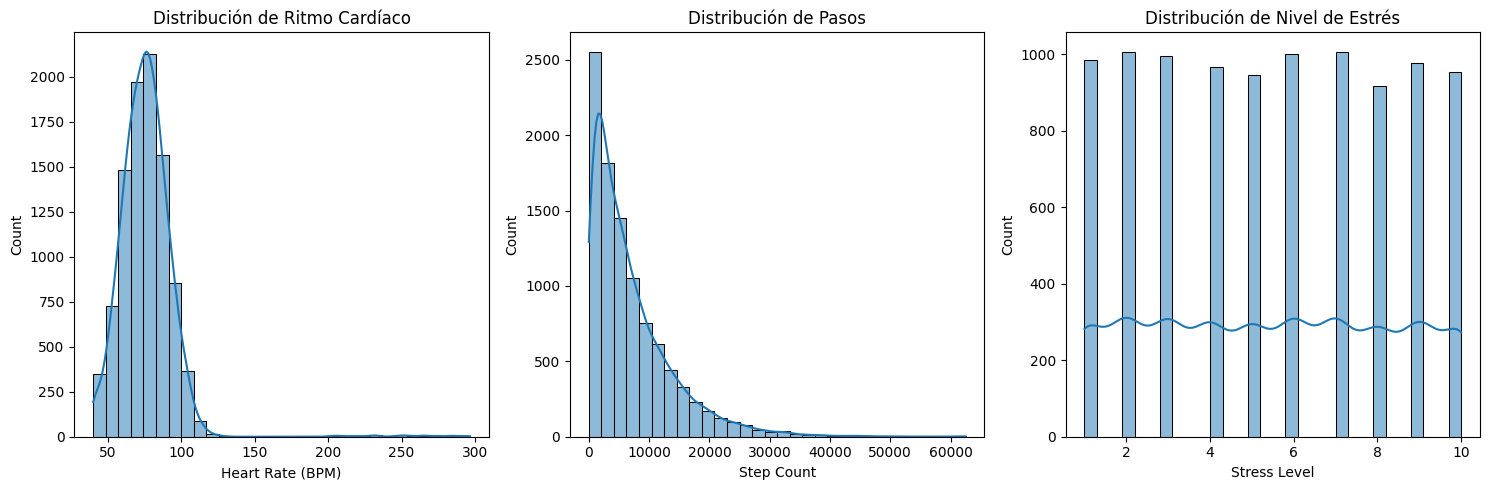

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de los datos 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Heart Rate (BPM)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Ritmo Cardíaco')

sns.histplot(df['Step Count'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Pasos')

sns.histplot(df['Stress Level'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribución de Nivel de Estrés')

plt.tight_layout()
plt.show()

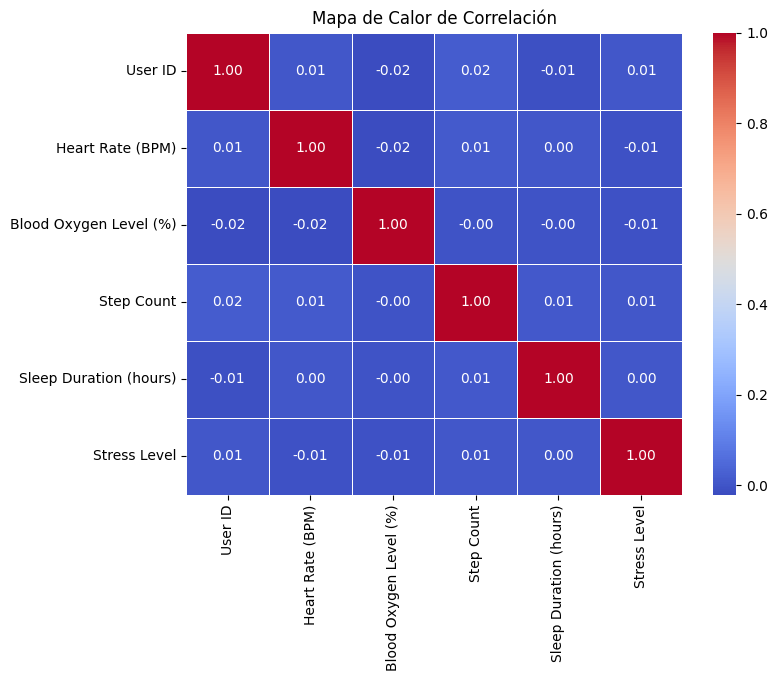

In [27]:
import pandas as pd
import numpy as np

# Matriz de correlación
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

# Estrategias de imputación #
## Variables numéricas ##
Para los valores NA en las categorías Heart Rate, Blood Oxygen Level, Step Count y Sleep Duration se realizará una imputación por la media de los valores de dichas columnas
## Variables categóricas ##
Para las variables categóricas con datos NA como Activity Level, se aplicará con una nueva categoría definida como **Desconocido** 

## Pre-Procesamiento en pipelines ##

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

## Imputación de valores faltantes en variables numéricas ##
### Heart Rate (BPM),Step Count,Sleep Duration (hours),Blood Oxygen Level (%) ###

In [29]:
num_features = ['Heart Rate (BPM)', 'Step Count', 'Sleep Duration (hours)', 'Blood Oxygen Level (%)']
num_imputer = SimpleImputer(strategy='mean')
df[num_features] = num_imputer.fit_transform(df[num_features])

### Imputación por mediana para Stress Level ###

In [30]:
stress_imputer = SimpleImputer(strategy='median')
df['Stress Level'] = stress_imputer.fit_transform(df[['Stress Level']])

### Imputación de valores faltantes en User ID con valores únicos no asignados ###

In [31]:
existing_ids = set(df['User ID'].dropna().astype(int))
all_possible_ids = set(range(1001, 5000))
available_ids = list(all_possible_ids - existing_ids)
np.random.shuffle(available_ids)
df.loc[df['User ID'].isna(), 'User ID'] = available_ids[:df['User ID'].isna().sum()]

### Imputación de valores faltantes y ordenamiento en Activity Level ###

In [32]:
df['Activity Level'].fillna('Desconocido', inplace=True)
df['Activity Level'] = df['Activity Level'].astype(str).str.strip()
print("Valores únicos en 'Activity Level' antes de la transformación:", df['Activity Level'].unique())
df.loc[~df['Activity Level'].isin(['Desconocido', 'Sedentary', 'Active', 'Highly Active']), 'Activity Level'] = 'Desconocido'
activity_order = ['Desconocido', 'Sedentary', 'Active', 'Highly Active']
ordinal_encoder = OrdinalEncoder(categories=[activity_order])
df['Activity Level'] = ordinal_encoder.fit_transform(df[['Activity Level']])

Valores únicos en 'Activity Level' antes de la transformación: ['Highly Active' 'Actve' 'Seddentary' 'Sedentary' 'Active' 'nan']


C:\Users\Alejo\AppData\Local\Temp\ipykernel_2168\4191002606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Activity Level'].fillna('Desconocido', inplace=True)


## DATASET FINAL ##

In [33]:
print(df.head())

   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0     4174         58.939776               98.809650   5450.390578   
1     4541         76.035462               98.532195    727.601610   
2     1860        247.803052               97.052954   2826.521994   
3     2294         40.000000               96.894213  13797.338044   
4     2130         61.950165               98.583797  15679.067648   

   Sleep Duration (hours)  Activity Level  Stress Level  
0                7.167236             3.0           1.0  
1                6.538239             3.0           5.0  
2                6.505463             3.0           5.0  
3                7.367790             0.0           3.0  
4                6.505463             3.0           6.0  
